**Part 1**

1.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_header = pd.read_csv('STONYBRK_20240531_HEADER.csv')
df_line = pd.read_csv('STONYBRK_20240531_LINE.csv')
df_code = pd.read_csv('STONYBRK_20240531_CODE.csv')

1.2 Header

In [ ]:
print(f"Shape: {df_header.shape}")
print(f"\nFirst 5 row:")
print(df_header.head(5))
print(f"\nColumn names and types:")
print(df_header.dtypes)
print(f"\nMissing values:")
print(df_header.isnull().sum())
print(f"\nDescriptive statistics:")
print(df_header.describe)

Shape: (388, 43)

First 5 row:
   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2

1.2 Line

In [ ]:
print(f"Shape: {df_line.shape}")
print(f"\nFirst 5 rows:")
print(df_line.head(5))
print(f"\nColumn names and thpes")
print(df_line.dtypes)
print(f"\nMissing values:")
print(df_line.isnull().sum())
print(f"\nDescriptive statistics:")
print(df_line.describe)

Shape: (520, 28)

First 5 rows:
   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
3        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   
4        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   

   NDCUnits  NDCRx NDCUnitQualifier 

1.2 Code

In [ ]:
print(f"Shape: {df_code.shape}")
print(f"\nFirst 5 rows:")
print(df_code.head(5))
print(f"\nColumn names and thpes")
print(df_code.dtypes)
print(f"\nMissing values:")
print(df_code.isnull().sum())
print(f"\nDescriptive statistics:")
print(df_code.describe)

Shape: (1536, 9)

First 5 rows:
   ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  

Column names and thpes
ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt              float64
POAInd 

1.3 Observation

In [ ]:
# 1. How many unique claims?
unique_claims = df_header['ProspectiveClaimId'].nunique()
print(f"1. Number of unique claims: {unique_claims:,}")

# 2. Date range of the claims
df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])
df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'])
date_range = f"{df_header['ServiceFromDate'].min().date()} to {df_header['ServiceFromDate'].max().date()}"
print(f"2. Date range of claims: {date_range}")

# 3. Average service lines per claim
lines_per_claim = df_line.groupby('ProspectiveClaimId').size().mean()
print(f"3. Average service lines per claim: {lines_per_claim:.2f}")

# 4. Average diagnosis codes per claim
dx_per_claim = df_code.groupby('ProspectiveClaimId').size().mean()
print(f"4. Average diagnosis codes per claim: {dx_per_claim:.2f}")

1. Number of unique claims: 388
2. Date range of claims: 2023-09-25 to 2024-05-29
3. Average service lines per claim: 1.34
4. Average diagnosis codes per claim: 3.96


/tmp/ipython-input-1309896452.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])
/tmp/ipython-input-1309896452.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'])


**Part 2**

                          ProviderName  BillingProviderNPI  ClaimCount
5                        SB INTERNISTS          1821035601         152
0               SB SURGICAL ASSOCIATES          1063468536          81
2     NEW YORK SPINE AND BRAIN SURGERY          1154376309          69
4  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          1538114723          40
3            SB PSYCHIATRIC ASSOCIATES          1437105905          36


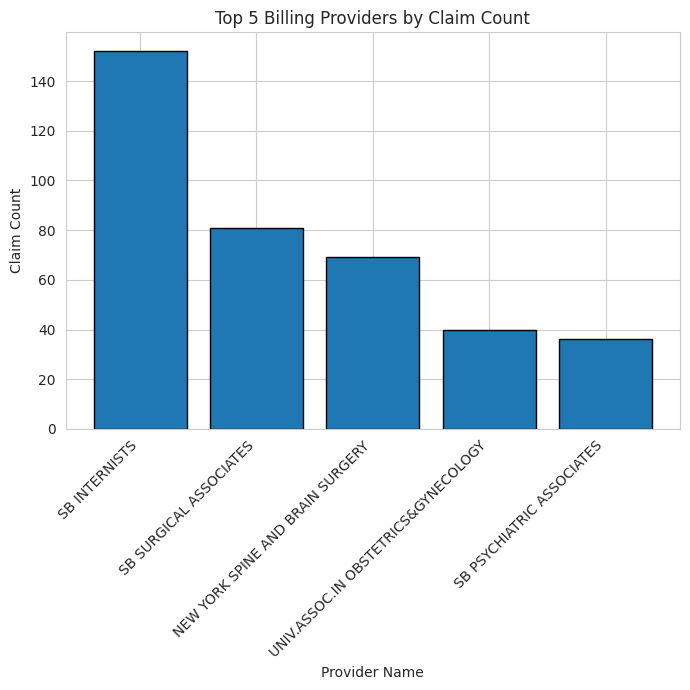

In [ ]:
## Question 1: Provider Analysis
# Sorts the top 5 billing providers.
provider_counts = df_header.groupby(['BillingProviderNPI', 'BillingProvFirstName']).size().reset_index(name='ClaimCount')
provider_counts = provider_counts.sort_values('ClaimCount', ascending=False).head(5)

# Rename billing first name to provider name
provider_counts['ProviderName'] = provider_counts['BillingProvFirstName']

# Print the top 5 results
print(provider_counts[['ProviderName', 'BillingProviderNPI', 'ClaimCount']])

# Bar chart
plt.figure(figsize=(7, 7))
plt.bar(provider_counts['ProviderName'], provider_counts['ClaimCount'], edgecolor='black')
plt.xlabel('Provider Name')
plt.ylabel('Claim Count')
plt.title('Top 5 Billing Providers by Claim Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 5 primary payers by claim volume
PrimaryPayerName
MEDICARE                      242
HEALTHFIRST FFS                46
FIDELIS/BETTER HEALTH PLAN     26
HIP MEDICAID                   17
HEALTHFIRST CAPITATED          10
Name: count, dtype: int64
             PrimaryPayerName  ClaimCount  Percentage
0                    MEDICARE         242       62.37
1             HEALTHFIRST FFS          46       11.86
2  FIDELIS/BETTER HEALTH PLAN          26        6.70
3                HIP MEDICAID          17        4.38
4       HEALTHFIRST CAPITATED          10        2.58


/tmp/ipython-input-1592376232.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PrimaryPayerName', y='ClaimCount', data=payer_df, palette='viridis', edgecolor='black')


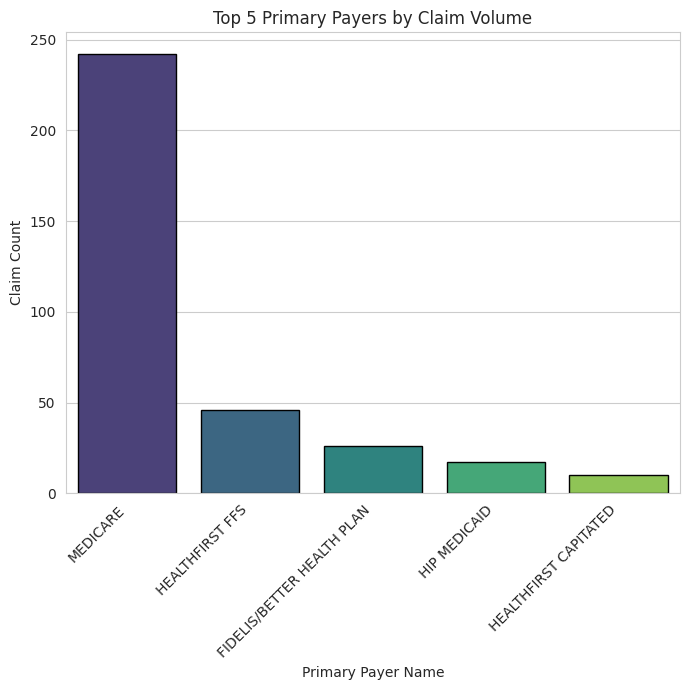

In [ ]:
## Question 2: Payer Mix Analysis
# Find the top 5 primary payers by claim volume
payer_volume = df_header['PrimaryPayerName'].value_counts().head(5)
print(f"Top 5 primary payers by claim volume")
print(payer_volume)

# Calculate percentage of total claims for each payer
total_claims = len(df_header)
payer_percentages = (payer_volume / total_claims * 100).round(2)

# Creates a dataframe to show payer
payer_df = pd.DataFrame({
    'PrimaryPayerName': payer_volume.index,
    'ClaimCount': payer_volume.values,
    'Percentage': payer_percentages.values
})

print(payer_df)

# Bar chart
plt.figure(figsize=(7, 7))
sns.barplot(x='PrimaryPayerName', y='ClaimCount', data=payer_df, palette='viridis', edgecolor='black')
plt.xlabel('Primary Payer Name')
plt.ylabel('Claim Count')
plt.title('Top 5 Primary Payers by Claim Volume')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ICD-10 Code  Frequency
     J96.01         62
        I10         49
      E78.5         49
      G93.5         34
      D64.9         29
     I25.10         27
      I61.9         26
     I48.91         24
      I60.8         24
      I50.9         22


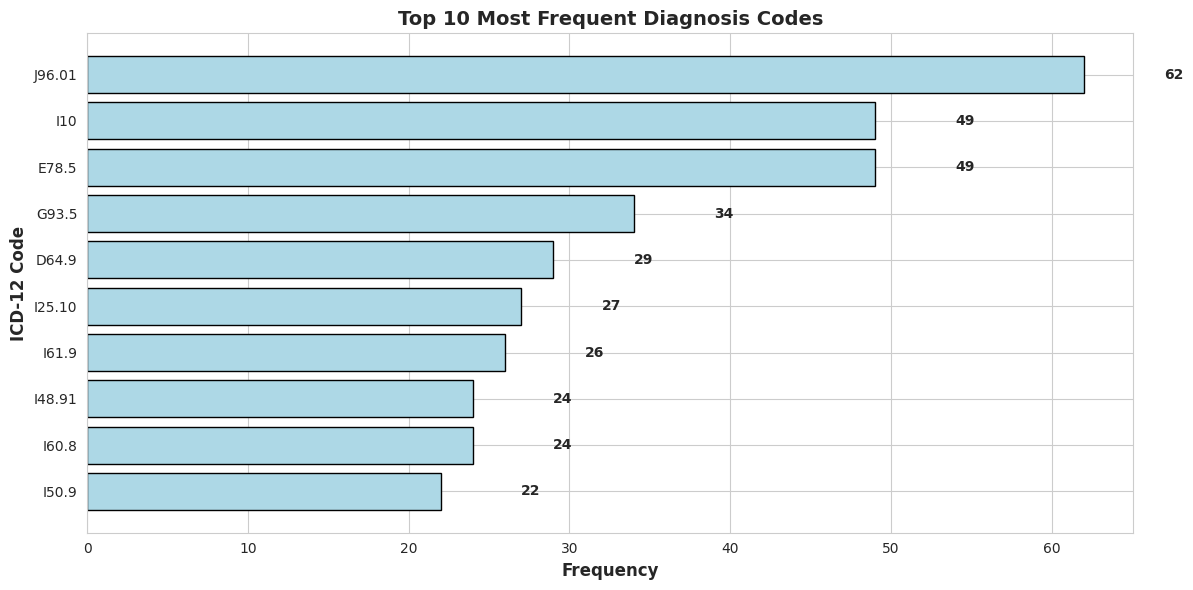

In [ ]:
## Question 3: Common Diagnoses
# 10 most frequently appearing diagnosis codes using CodeValue
top_diagnoses = df_code['CodeValue'].value_counts().head(10).reset_index()
top_diagnoses.columns = ['ICD-10 Code', 'Frequency']

print(top_diagnoses.to_string(index=False))
# print("\nNote: Look up these codes at icd10data.com for detailed descriptions")

# Visualization
plt.figure(figsize=(12, 6))
plt.barh(top_diagnoses['ICD-10 Code'], top_diagnoses['Frequency'], color='lightblue', edgecolor='black')
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('ICD-12 Code', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Frequent Diagnosis Codes', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_diagnoses['Frequency']):
    plt.text(v + 5, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

HCPCS Code  Frequency
     99291         68
     99233         48
     99213         39
     99223         33
     99222         32
     99232         21
     90833         16
     99204         14
     99214         14
     92557         14


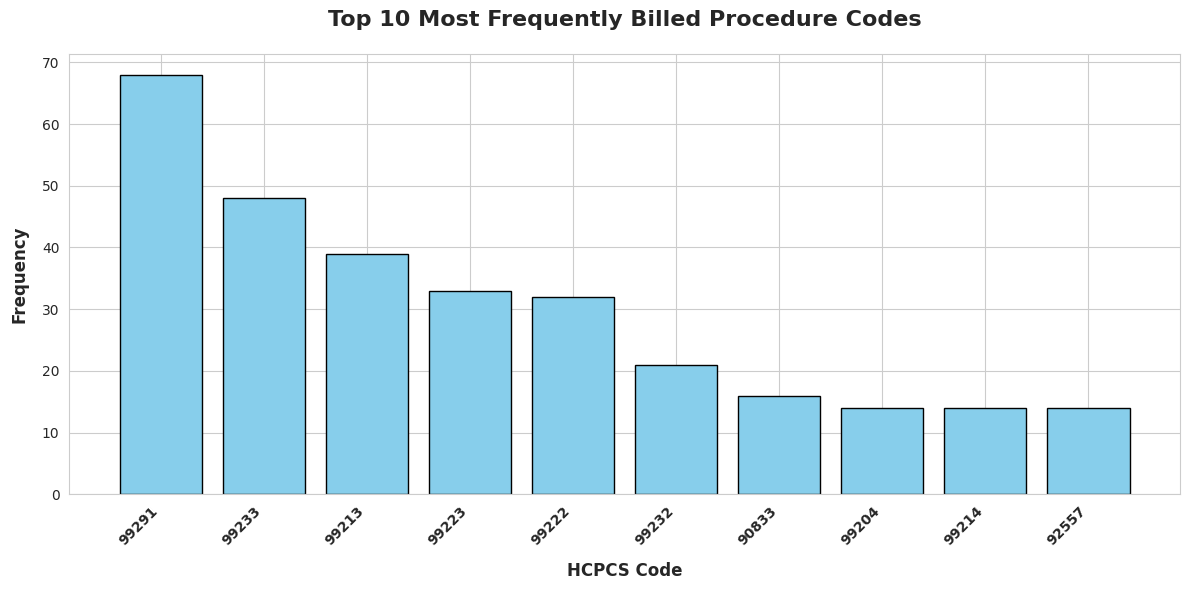

In [ ]:
## Question 4: Common Procedures
# find top 10 billed procedure
top_procedures = df_line['HCPCS'].value_counts().head(10).reset_index()
top_procedures.columns = ['HCPCS Code', 'Frequency']

print(top_procedures.to_string(index=False))

# Visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid") # Apply a seaborn style
plt.bar(range(len(top_procedures)), top_procedures['Frequency'], color='skyblue', edgecolor='black')
plt.xticks(range(len(top_procedures)), top_procedures['HCPCS Code'], rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('HCPCS Code', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Frequency', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Top 10 Most Frequently Billed Procedure Codes', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
## Question 5: Service Location Analysis
# Find counts for each place of service and create two columns showing the data
place_counts = df_header['PlaceOfService'].value_counts().reset_index()
place_counts.columns = ['PlaceOfService', 'ClaimCount']

print("Claims by Place of Service:")
print(place_counts.to_string(index=False))
print("\nPlace of Service Definitions:")
print("21: Inpatient Hospital")
print("11: Office")
print("22: On Campus-Outpatient Hospital")
print("23: Emergency Room")

# Find the total number of claims
total_claims = len(df_header)

# Find percentage of claims for each place of service
place_counts['Percentage'] = (place_counts['ClaimCount'] / total_claims * 100).round(2)

print("\nClaims with Percentages:")
print(place_counts)

# Match the facility location to the claim counts
facility_counts = df_header['Facility_Location'].value_counts().reset_index()
facility_counts.columns = ['Facility_Location', 'ClaimCount']
facility_counts['Percentage'] = (facility_counts['ClaimCount'] / total_claims * 100).round(2)

# Filter for only 'INPATIENT' and 'DOCTOR\'S OFFICE'
filtered_facility_counts = facility_counts[facility_counts['Facility_Location'].isin(['INPATIENT', "DOCTOR'S OFFICE"])]

print("\nFiltered Claims by Facility Location:")
print(filtered_facility_counts)

Claims by Place of Service:
 PlaceOfService  ClaimCount
             21         231
             11         132
             22          24
             23           1

Place of Service Definitions:
21: Inpatient Hospital
11: Office
22: On Campus-Outpatient Hospital
23: Emergency Room

Claims with Percentages:
   PlaceOfService  ClaimCount  Percentage
0              21         231       59.54
1              11         132       34.02
2              22          24        6.19
3              23           1        0.26

Filtered Claims by Facility Location:
  Facility_Location  ClaimCount  Percentage
0         INPATIENT         231       59.54
1   DOCTOR'S OFFICE         132       34.02


**Part 3**

In [ ]:
## Question 6: Claims with High Service Line Counts
# Merge the HEADER and LINE files
merged_data = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')
lines_per_claim = merged_data.groupby('ProspectiveClaimId').size().reset_index(name='Number of lines')
print("\nService lines per claim:")
print(lines_per_claim)

# Identify claims with 5 or more service lines
high_line = lines_per_claim[lines_per_claim['Number of lines'] >= 5]
print(f"\nNumber of claims with 5+ service lines: {len(high_line)}")

# Merge to get provider name and calculate the total charges
# Get total charges per claim from line and then get name from header
claim_charges = merged_data.groupby('ProspectiveClaimId').agg({
    'Charges': 'sum',
    'BillingProvFirstName': 'first'
}).reset_index()

claim_charges.columns = ['ProspectiveClaimId', 'Total Charges', 'Provider name']

# Merge with high_line
high_line = high_line.merge(claim_charges, on='ProspectiveClaimId', how='left')

# Displa Claim Id, Provider name, number of lines, and total charges
print("\nClaims with 5 or more service lines:")
print(high_line[['ProspectiveClaimId', 'Provider name', 'Number of lines', 'Total Charges']])


Service lines per claim:
     ProspectiveClaimId  Number of lines
0              35216986                1
1              35235657                1
2              35244774                1
3              35249003                1
4              35249014                1
..                  ...              ...
383            36999799                3
384            37001070                4
385            37001295                3
386            37001309                3
387            37001489                2

[388 rows x 2 columns]

Number of claims with 5+ service lines: 5

Claims with 5 or more service lines:
   ProspectiveClaimId                        Provider name  Number of lines  \
0            36668119  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                6   
1            36710175  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                5   
2            36740402  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                6   
3            36757684  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY   

In [ ]:
## Question 7: Diagnosis-Procedure Combinations
# Merge the 3 datasets
header_line = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')
hl_code = header_line.merge(df_code, on='ProspectiveClaimId', how='inner')

# Filter for 99291
cpt_99291 = hl_code[hl_code['HCPCS'] == '99291']

# Do a count of all the diagnosis codes on cpt 99291
diagnosis_count = cpt_99291['CodeValue'].value_counts().reset_index()
diagnosis_count.columns = ['DiagnosisCode', 'Frequency']

# Print the top diagnosis code
top_diagnosis = diagnosis_count.iloc[0]
print(f"Most common diagnosis code: {top_diagnosis['DiagnosisCode']}")


Most common diagnosis code: J96.01


In [ ]:
## Question 8: Charges by Payer
# Merge header and line dataset
head_line = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')

# Calculate total charges per claim
total_claim = header_line.groupby('ProspectiveClaimId').agg({
    'Charges': 'sum',
    'PrimaryPayerName': 'first'
}).reset_index()

# Rename columns
total_claim.columns = ['Claim ID', 'Total charges', 'Payer name']
print(total_claim)

# Group by payer name and calculate the charges and claim
payer_stats = total_claim.groupby('Payer name').agg({
    'Total charges': 'sum',
    'Claim ID': 'count'
}).reset_index()

# Rename the columns
payer_stats.columns = ['Payer name', 'Total charges', 'Number of claims']

# Calculate the averages
payer_stats['Average charges'] = (payer_stats['Total charges'] / payer_stats['Number of claims']).round(2)

# Sort the payers by total charges descending
payer_stats = payer_stats.sort_values('Total charges', ascending=False)

# Display top 10 payers
print("\nTop 10 Payers by Total Charges:")
print(payer_stats.head(10))

     Claim ID  Total charges                          Payer name
0    35216986           1155                               AETNA
1    35235657           1155                               AETNA
2    35244774           1155                               AETNA
3    35249003           1155  UNITED COMMUNITY PLAN GOVT PROGRAM
4    35249014           1155                                MMIS
..        ...            ...                                 ...
383  36999799            855                            MEDICARE
384  37001070           1150                        HIP MEDICAID
385  37001295            211          FIDELIS/BETTER HEALTH PLAN
386  37001309            210                        HIP MEDICAID
387  37001489            105          FIDELIS/BETTER HEALTH PLAN

[388 rows x 3 columns]

Top 10 Payers by Total Charges:
                            Payer name  Total charges  Number of claims  \
17                            MEDICARE         131008               242   
12           

**Part 4**

                      Provider Name  Avg Diagnoses per Claim  Total Claims
   NEW YORK SPINE AND BRAIN SURGERY                 9.231884            69
                      SB INTERNISTS                 3.592105           152
              SB CHILDREN'S SERVICE                 3.333333             9
UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                 2.125000            40
             SB SURGICAL ASSOCIATES                 2.049383            81
          SB PSYCHIATRIC ASSOCIATES                 1.805556            36


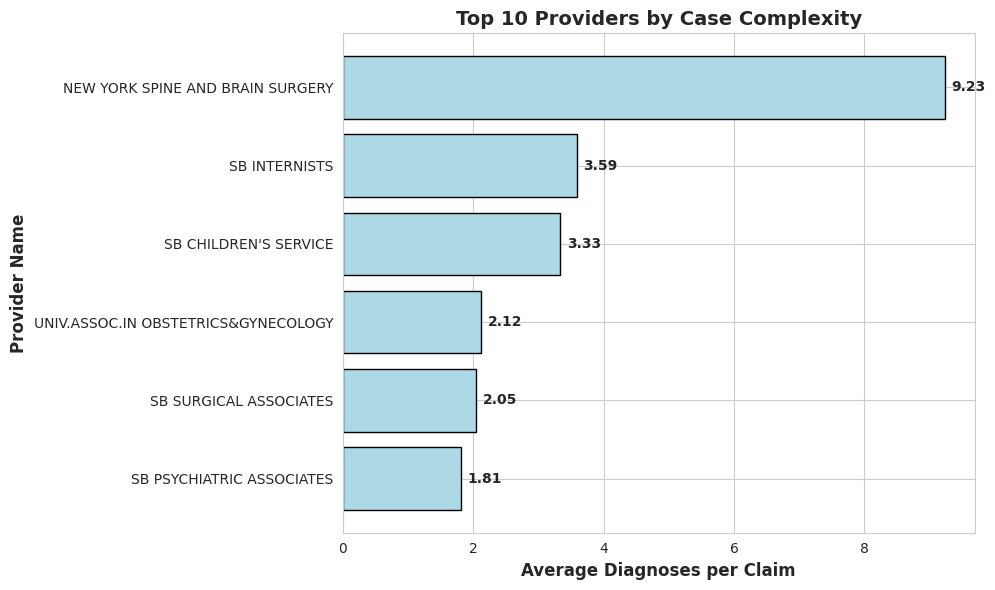

In [ ]:
## Question 9: Which providers bill for the most complex cases (highest number of diagnosis codes)?

# More diagnosis code, higher complexity
provider_avg_complexity = df_code.groupby('ProspectiveClaimId').size().to_frame(name='DiagnosisCount').reset_index() \
    .merge(df_header[['ProspectiveClaimId', 'BillingProvFirstName']], on='ProspectiveClaimId') \
    .groupby('BillingProvFirstName').agg(
        AvgDiagnosesPerClaim=('DiagnosisCount', 'mean'),
        TotalClaims=('DiagnosisCount', 'count')
    ) \
    .reset_index() \
    .rename(columns={'BillingProvFirstName': 'Provider Name',
                     'AvgDiagnosesPerClaim': 'Avg Diagnoses per Claim',
                     'TotalClaims': 'Total Claims'}) \
    .loc[lambda df: df['Total Claims'] >= 5] \
    .sort_values('Avg Diagnoses per Claim', ascending=False) \
    .head(10)

print(provider_avg_complexity.to_string(index=False))

# Graph
sns.set_style("whitegrid") # Apply a clean seaborn style
plt.figure(figsize=(10, 6))
plt.barh(provider_avg_complexity['Provider Name'],
         provider_avg_complexity['Avg Diagnoses per Claim'],
         color='lightblue',
         edgecolor='black') # Add black edges to the bars
plt.xlabel('Average Diagnoses per Claim', fontsize=12, fontweight='bold')
plt.ylabel('Provider Name', fontsize=12, fontweight='bold')
plt.title('Top 10 Providers by Case Complexity',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(provider_avg_complexity['Avg Diagnoses per Claim']):
    plt.text(v + 0.1, i, f'{v:.2f}', va='center', fontweight='bold')
plt.tight_layout()
plt.show()